In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

<function matplotlib.pyplot.show>

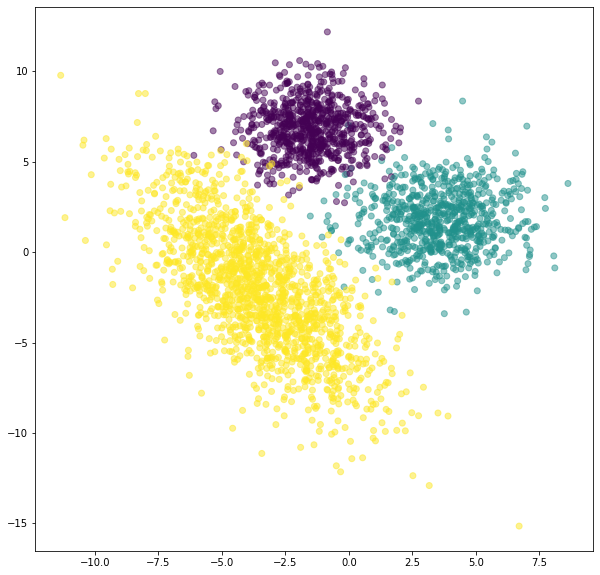

In [12]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show

# КОЭФФИЦИЕНТ СИЛУЭТА
Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.

 a — среднее расстояние от данного объекта до объектов из того же кластера.
 b — среднее расстояние от данного объекта до объектов из ближайшего кластера.
 
**` S = (b - a) / max(a, b)`**

Значение коэффициента находится в диапазоне от -1 до +1, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами. Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной. Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много, слишком мало или просто данные плохо поддаются разделению на кластеры.

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
# kmeans_pred = kmeans.labels_
kmeans_pred = kmeans.fit_predict(X)
# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131209788437305

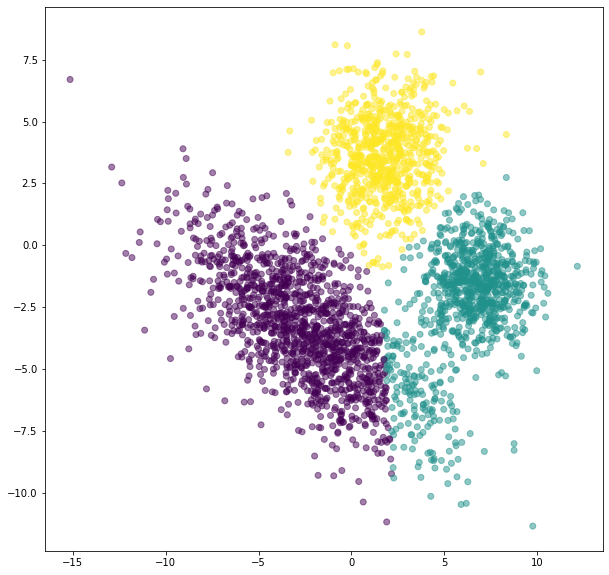

In [15]:
plt.scatter(X[:, 1], X[:, 0], c=kmeans_pred, alpha=0.5)
plt.show()

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

In [17]:
from sklearn.mixture import GaussianMixture

In [21]:
gm = GaussianMixture(random_state=42, n_components=3)
gm_pred = gm.fit_predict(X)
silhouette_score(X, labels=gm_pred)

0.39874330908409644

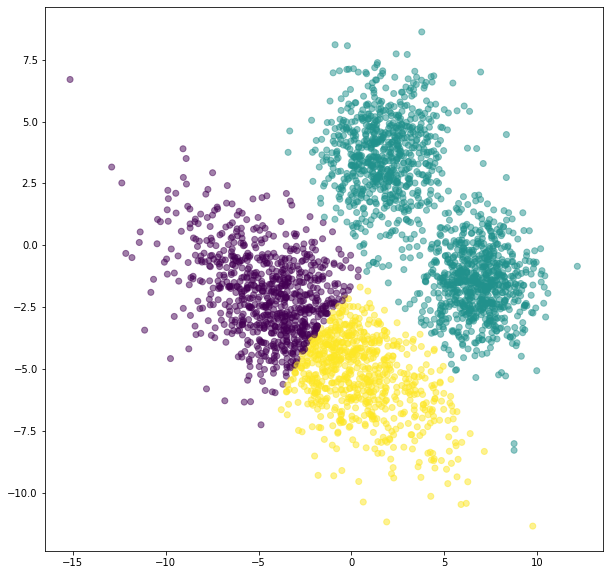

In [25]:
plt.scatter(X[:, 1], X[:, 0], c=gm_pred, alpha=0.5)

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

K-means — n_clusters=3, random_state=42
EM-алгоритм (GaussianMixture) — n_components=3, random_state=42
Агломеративная кластеризация – n_clusters=3
DBSCAN – eps=0.9, min_samples=35
Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [27]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
kmeans = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbs = DBSCAN(eps=0.9, min_samples=35)

In [64]:
clasters = {'kmeans': kmeans, 'gm': gm, 'ac': ac, 'dbs': dbs}
for cls, val in clasters.items():
  cls_pred = val.fit_predict(X)
  print(cls, silhouette_score(X, labels=cls_pred))

kmeans 0.5131209788437305
gm 0.39874330908409644
ac 0.4811992210663849
dbs 0.4454335539277996


Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [119]:
kmeans = KMeans(n_clusters=4, random_state=42)
cls_pred = kmeans.fit(X).labels_

print(silhouette_score(X, labels=cls_pred))

0.5114911234090096


In [159]:
# берем по одной модели и передаем в нее по очереди число кластеров и возвращаем макимасльное 
list_models = [KMeans, GaussianMixture, AgglomerativeClustering]

def max_components(cls, X, start=2, stop=10):
  max_comp = {}
  for i in range(start, stop+1):
    # print(i)
    if cls == KMeans:
      cls_pred = cls(random_state=42, n_clusters=i).fit(X).labels_
      # print(cls, silhouette_score(X, labels=cls_pred))
      max_comp[i]= silhouette_score(X, labels=cls_pred)
    if cls == GaussianMixture:
      cls_pred = cls(random_state=42, n_components=i).fit_predict(X)
      # print(cls, silhouette_score(X, labels=cls_pred))
      max_comp[i]= silhouette_score(X, labels=cls_pred)
    if cls == AgglomerativeClustering:
      cls_pred = cls(n_clusters=i).fit(X).labels_
      max_comp[i]= silhouette_score(X, labels=cls_pred)
  return max(max_comp, key=max_comp.get)
[max_components(clf, X) for clf in list_models]

[3, 4, 4]